In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pickle
from flask import Flask, request, jsonify


from sklearn.model_selection import train_test_split #train our module
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [37]:
import torch 
torch.cuda.is_available()

True

In [38]:
df = pd.read_csv('russia_losses_equipment.csv')
print(df.head())
print(df.columns)
print(df.shape[0])

         date  day  aircraft  helicopter  tank  APC  field artillery  MRL  \
0  2022-02-25    2        10           7    80  516               49    4   
1  2022-02-26    3        27          26   146  706               49    4   
2  2022-02-27    4        27          26   150  706               50    4   
3  2022-02-28    5        29          29   150  816               74   21   
4  2022-03-01    6        29          29   198  846               77   24   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0          100.0       60.0      0           2                      0   
1          130.0       60.0      2           2                      0   
2          130.0       60.0      2           2                      0   
3          291.0       60.0      3           2                      5   
4          305.0       60.0      3           2                      7   

   special equipment  mobile SRBM system greatest losses direction  \
0                NaN        

In [39]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,65.000000,65.000000,395.000000,395.000000,395.000000,376.000000,36.000000,330.000000,330.000000
mean,199.000000,232.921519,211.967089,2098.126582,4457.972152,1294.458228,301.726582,1047.507692,69.323077,1045.091139,13.840506,151.805063,121.255319,3.944444,3797.500000,413.993939
std,114.170924,64.794571,61.818396,967.923865,1705.429199,743.553903,131.007173,466.162060,7.545917,682.146583,4.208691,69.647736,70.660833,0.333333,1075.694026,284.487712
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,100.500000,210.000000,175.000000,1371.500000,3372.500000,677.500000,207.000000,600.000000,60.000000,537.500000,13.000000,95.000000,55.000000,4.000000,2807.250000,167.000000
50%,199.000000,239.000000,212.000000,2136.000000,4584.000000,1259.000000,311.000000,1178.000000,73.000000,898.000000,15.000000,162.000000,125.000000,4.000000,3931.000000,315.500000
75%,297.500000,281.000000,264.000000,2986.000000,5960.500000,1947.500000,410.000000,1437.000000,76.000000,1648.500000,16.000000,211.000000,178.000000,4.000000,4732.500000,723.000000
max,396.000000,305.000000,291.000000,3595.000000,6947.000000,2631.000000,522.000000,1701.000000,76.000000,2216.000000,18.000000,277.000000,282.000000,4.000000,5486.000000,911.000000


In [40]:
data_losses_equipment_path ='russia_losses_equipment.csv'

In [41]:
df_losses_equipment = pd.read_csv(data_losses_equipment_path)
df_losses_equipment['date'] = pd.to_datetime(df_losses_equipment['date'])
df_losses_equipment = df_losses_equipment.set_index(['date', 'day','aircraft','helicopter','tank','MRL','military auto','fuel tank','drone','naval ship','anti-aircraft warfare','special equipment','mobile SRBM system','greatest losses direction','vehicles and fuel tanks','cruise missiles'])


df_losses_equipment.tail(10)

,,,,,,,,,,,,,,,,APC,field artillery
date,day,aircraft,helicopter,tank,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,,
2023-03-17,387,305,290,3506,504,NaN,NaN,2145,18,265,258.0,NaN,NaN,5401.0,907.0,6823,2552
2023-03-18,388,305,290,3511,506,NaN,NaN,2159,18,265,259.0,NaN,NaN,5404.0,907.0,6830,2560
2023-03-19,389,305,290,3532,507,NaN,NaN,2159,18,268,262.0,NaN,NaN,5408.0,907.0,6853,2568
2023-03-20,390,305,290,3537,507,NaN,NaN,2160,18,270,265.0,NaN,NaN,5416.0,907.0,6869,2577
2023-03-21,391,305,290,3552,507,NaN,NaN,2167,18,270,266.0,NaN,NaN,5428.0,907.0,6879,2586
2023-03-22,392,305,290,3557,509,NaN,NaN,2183,18,272,270.0,NaN,NaN,5434.0,909.0,6887,2589
2023-03-23,393,305,290,3570,511,NaN,NaN,2203,18,273,273.0,NaN,NaN,5452.0,909.0,6898,2608
2023-03-24,394,305,290,3574,511,NaN,NaN,2208,18,276,277.0,NaN,NaN,5464.0,911.0,6921,2616
2023-03-25,395,305,291,3580,520,NaN,NaN,2214,18,276,279.0,NaN,NaN,5483.0,911.0,6932,2623


In [42]:


df.dtypes


date                          object
day                            int64
aircraft                       int64
helicopter                     int64
tank                           int64
APC                            int64
field artillery                int64
MRL                            int64
military auto                float64
fuel tank                    float64
drone                          int64
naval ship                     int64
anti-aircraft warfare          int64
special equipment            float64
mobile SRBM system           float64
greatest losses direction     object
vehicles and fuel tanks      float64
cruise missiles              float64
dtype: object

In [43]:
corr_df = df.corr()

print("corr", df.corr())

corr                               day  aircraft  helicopter      tank       APC  \
day                      1.000000  0.905407    0.961367  0.992540  0.985348   
aircraft                 0.905407  1.000000    0.974542  0.940688  0.955787   
helicopter               0.961367  0.974542    1.000000  0.980107  0.984224   
tank                     0.992540  0.940688    0.980107  1.000000  0.997730   
APC                      0.985348  0.955787    0.984224  0.997730  1.000000   
field artillery          0.996052  0.896125    0.960135  0.990504  0.980455   
MRL                      0.989943  0.948229    0.982834  0.997640  0.997347   
military auto            0.979363  0.993953    0.962985  0.988725  0.993803   
fuel tank                0.890240  0.921081    0.841115  0.887154  0.886196   
drone                    0.993799  0.889140    0.954234  0.986542  0.977862   
naval ship               0.858262  0.962158    0.915824  0.894705  0.919861   
anti-aircraft warfare    0.990475  0.933215    

C:\Users\stahl\AppData\Local\Temp\ipykernel_34460\2829830011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()
C:\Users\stahl\AppData\Local\Temp\ipykernel_34460\2829830011.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("corr", df.corr())


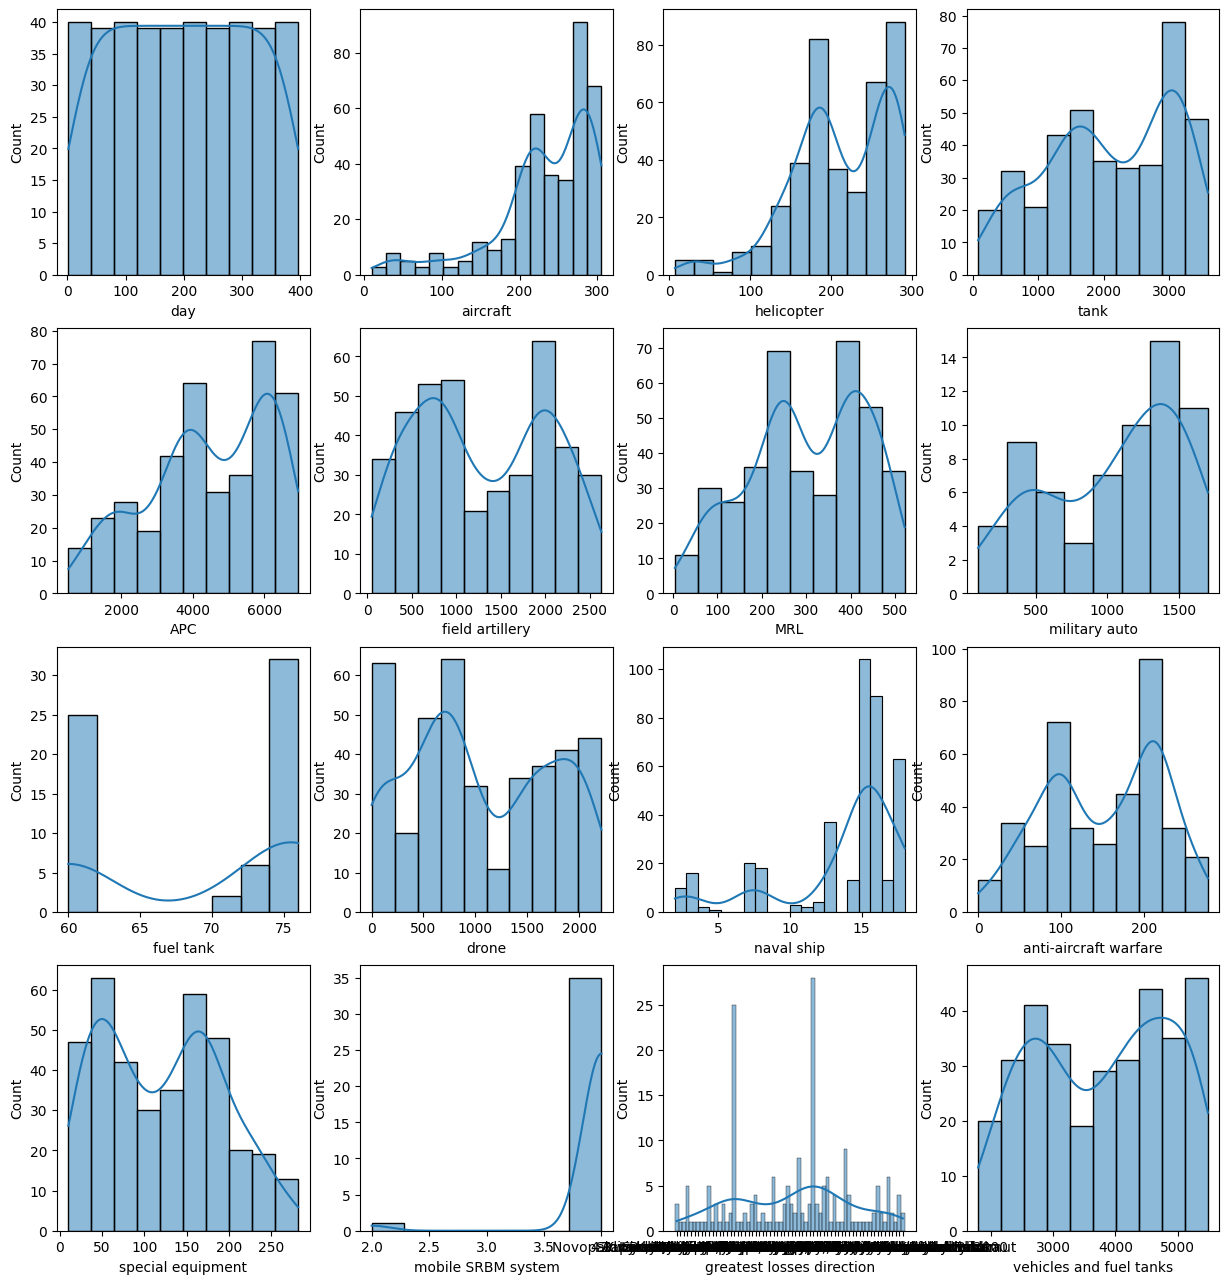

In [44]:
from scipy.stats import norm

plt.figure(figsize=(15, 20))

for i in range(1, len(df.columns) - 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[df.columns[i]], kde=True)

In [45]:
df.shape

(395, 18)

In [46]:

x = df.drop("date", axis=1)
y = df["date"]



In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [48]:

app = Flask(__name__)

@app.route("/ukraine", methods = ["POST"])
def send_data(): 
    json_ = request.json 
    query_df = pd.DataFrame(json_)
    prediction = model.predict(query_df)
    return jsonify({"Prediction": prediction.tolist()})

if __name__ == "__main__":
    app.run(debug=False)




 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
